In [198]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import seaborn as sns
import plotly
import plotly.express as px
#оптимизация для тёмной темы
plt.style.use('default')


churn_data = pd.read_csv('data/churn.csv') 
display(churn_data.head())

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [199]:
def translate_activeMember(state):
    if state == 1:
        return 'Активный'
    elif state == 0:
        return 'Не активный'
    else:
        return state

churn_data['IsActiveMember'] = churn_data['IsActiveMember'].apply(translate_activeMember)

## <center>  9.1 Oбщее количество ушедших и оставшихся клиентов.

Text(0.5, 1.0, 'Общее кол-во ушедших и оставшихся клиентов')

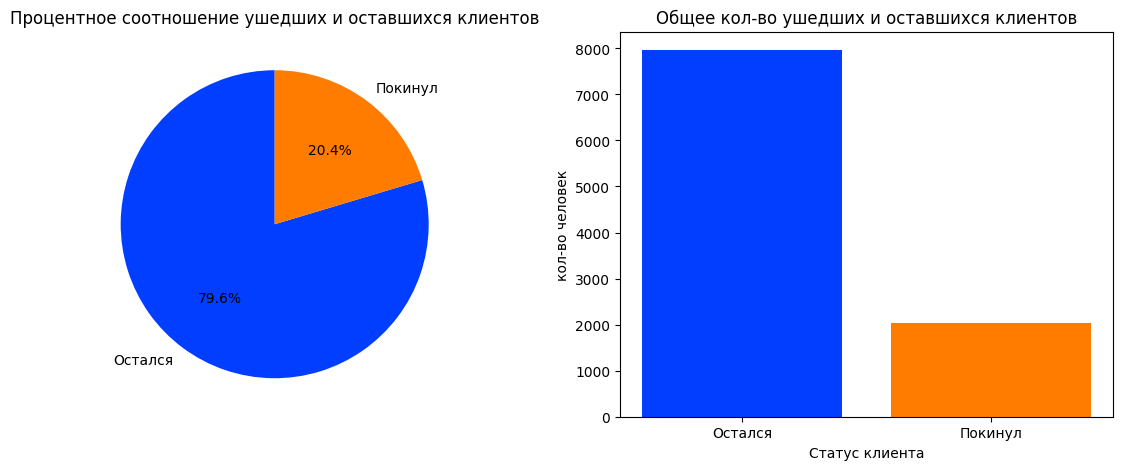

In [200]:
def replace_state(state):
    if state == 1:
        return 'Покинул'
    else:
        return 'Остался'
    
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
colors = sns.color_palette('bright')[0:2]

churn_data['modern_state'] = churn_data['Exited'].apply(replace_state)
churn_table1 = churn_data['modern_state'].value_counts()

#fig.set_title('Соотношение ушедших и оставшихся клиентов', fontsize=16)

axes[0].pie(
    churn_table1,
    labels=churn_table1.index,
    autopct='%1.1f%%',
    startangle=90,
    colors = colors
)
axes[0].set_title('Процентное соотношение ушедших и оставшихся клиентов')

axes[1].bar(
    x = churn_table1.index,
    height = churn_table1.values,
    color = colors
    );
axes[1].set_xlabel('Статус клиента')
axes[1].set_ylabel('кол-во человек')
axes[1].set_title('Общее кол-во ушедших и оставшихся клиентов')



По графикам можно сделать вывод, что большая часть клиентов остаются лояльны текущим условиям компании. Если доля покинувших клиентов ниже необходимого значения, то можно считать политику компании в отношении клиентов идеальной. Иначе - требуются доработки.

## <center> 9.2 Распределение пользователей, чей баланс на счёте больше $2500

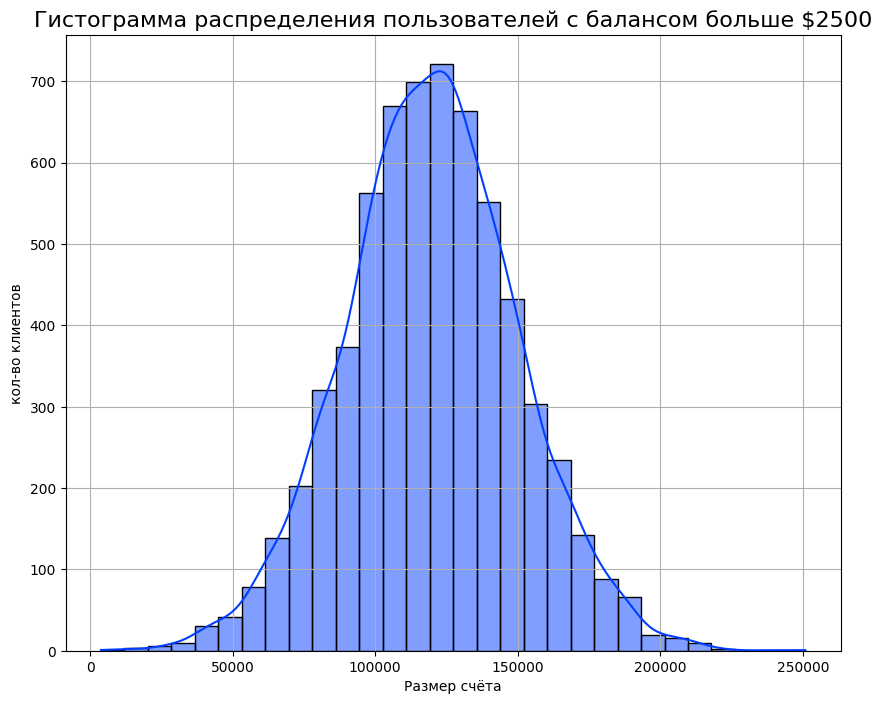

In [201]:
histogram_dt = churn_data[churn_data['Balance'] > 2500]
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))

hisplot1 = sns.histplot(
    data=histogram_dt,
    x='Balance',
    bins=30,
    kde=True,
    color=sns.color_palette('bright')[0]
)
axes.set_title('Гистограмма распределения пользователей с балансом больше $2500', fontsize=16)
axes.set_xlabel('Размер счёта')
axes.set_ylabel('кол-во клиентов')
axes.grid()


В ходе анализа гистограммы мы можем видеть, что среди пользователей банка больше всего преобладает "средняя полоса" с балансом от $100 - $150 тыс. Пользователи, чья сумма на счёте либо меньше $50 тыс., либо выше $200 тыс, находятся в меньшенстве, следовательно, для улучшения качества работы банка, следует ориентироваться на мнение клиентов "средней полосы".

## <center> 9.3 Распределение баланса в разрезе признака оттока

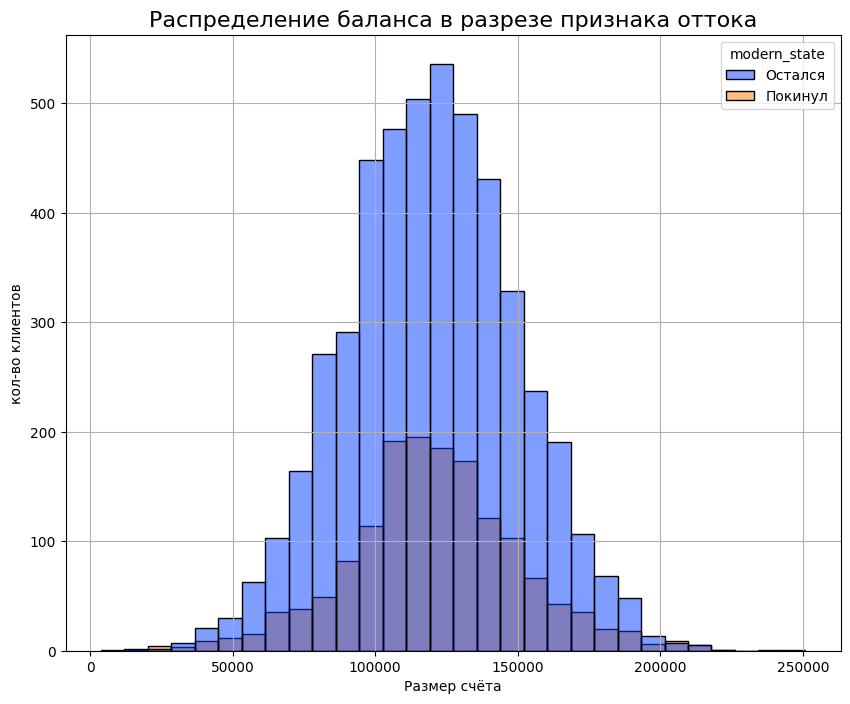

In [202]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))

hisplot1 = sns.histplot(
    data=histogram_dt,
    x='Balance',
    bins=30,
    hue='modern_state',
    ax=axes,
    palette=sns.color_palette('bright')[0:2]
)
axes.set_title('Распределение баланса в разрезе признака оттока', fontsize=16)
axes.set_xlabel('Размер счёта')
axes.set_ylabel('кол-во клиентов')
axes.grid()

Частота ушедших клиентов увеличивается при приближении к "средней полосе" клиентов. Если на счёте клиента $100-150 тыс. долларов, то шанс уйти примерно в 2 раза выше, нежели вне этой денежной границы. Скорее всего следует разрабатывать больше программ именно для этих клиентов.

## <center> 9.4 Распределение возраста в разрезе признака оттока

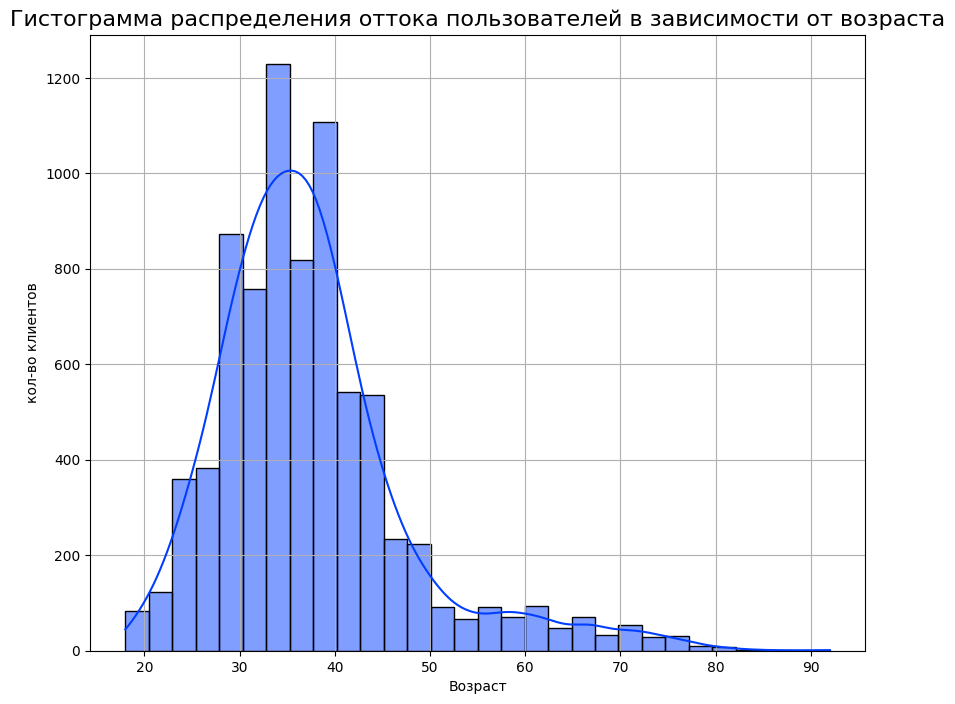

In [203]:
churn_data
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))


hisplot3 = sns.histplot(
    data=churn_data[churn_data['modern_state'] == 'Остался'],
    x='Age',
    bins=30,
    kde=True,
    color=sns.color_palette('bright')[0]
)
axes.set_title('Гистограмма распределения оттока пользователей в зависимости от возраста', fontsize=16)
axes.set_xlabel('Возраст')
axes.set_ylabel('кол-во клиентов')
axes.grid()

Чаще всего уходят из банка клиенты в возрасте от 28 до 40. Для уменьшения оттока клиентов следует уделить особое внимание этой возрастной категории.

## <center> 9.5 Взаимосвязь рейтинга клиента и уровня его З/П

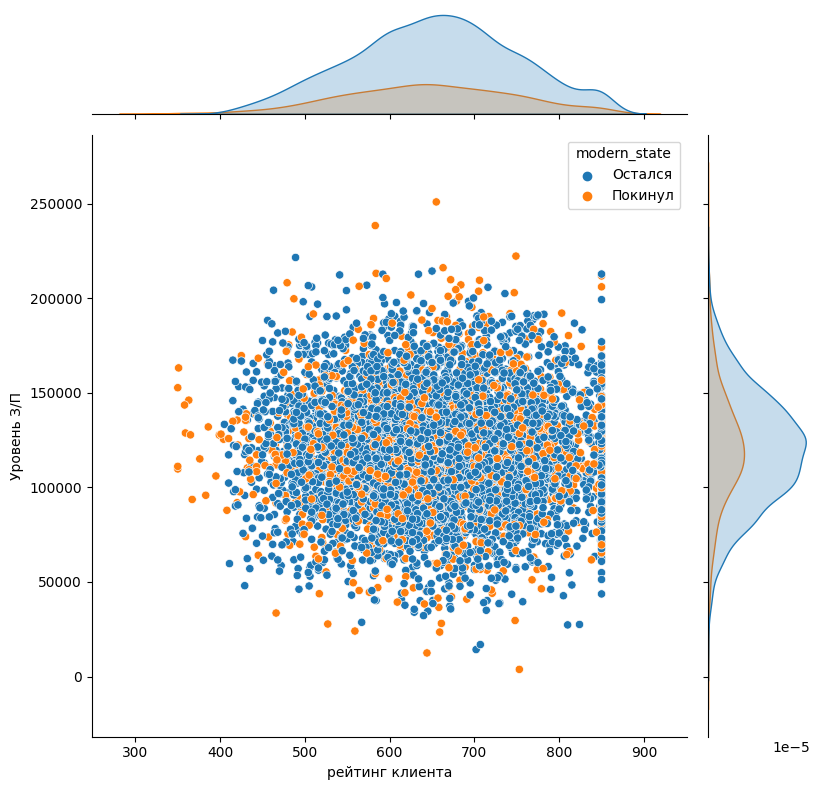

In [204]:
jointplot = sns.jointplot(
    data=histogram_dt, 
    x='CreditScore', 
    y='Balance',
    hue='modern_state',
    #xlim = (0, 40),
    #ylim = (0, 0.1),
    height=8,
)
jointplot.set_axis_labels('рейтинг клиента', 'Уровень З/П')

По графику можно сделать вывод, что если рейтинг клиента падает ниже 400 ед., то он собирается прекратить получение услуг банка. Так же больше всего ушедших клиентов в диапазоне рейтинга 600-700 и уровне З/П $100-150 тыс.

## <center> 9.6 Частота ухода клиента в зависимости от пола

Text(0.5, 1.0, 'Гендерное соотношение ушедших клиентов')

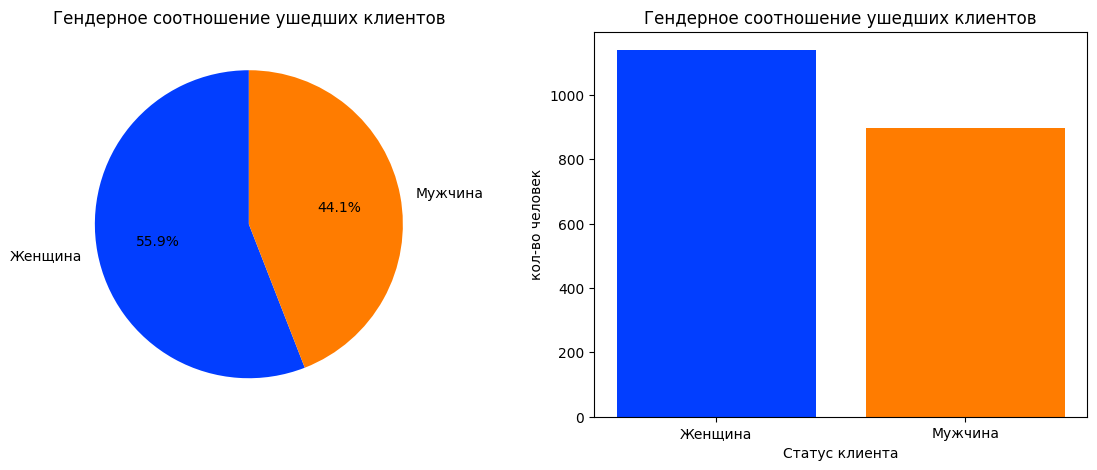

In [205]:

def translate_gender(state):
    if state == 'Male':
        return 'Мужчина'
    elif state == 'Female':
        return 'Женщина'
    else:
        return state

    
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
colors = sns.color_palette('bright')[0:2]

churn_data['Gender'] = churn_data['Gender'].apply(translate_gender)
churn_table1 = churn_data[churn_data['modern_state'] == 'Покинул']['Gender'].value_counts()

axes[0].pie(
    churn_table1,
    labels=churn_table1.index,
    autopct='%1.1f%%',
    startangle=90,
    colors = colors
)
axes[0].set_title('Гендерное соотношение ушедших клиентов')

axes[1].bar(
    x = churn_table1.index,
    height = churn_table1.values,
    color = colors
    );
axes[1].set_xlabel('Статус клиента')
axes[1].set_ylabel('кол-во человек')
axes[1].set_title('Гендерное соотношение ушедших клиентов')

В числе ушедших клиентов женщин немного больше, нежели мужчин.

## <center> 9.7 Отток клиентов в зависимости от приобретённых услуг

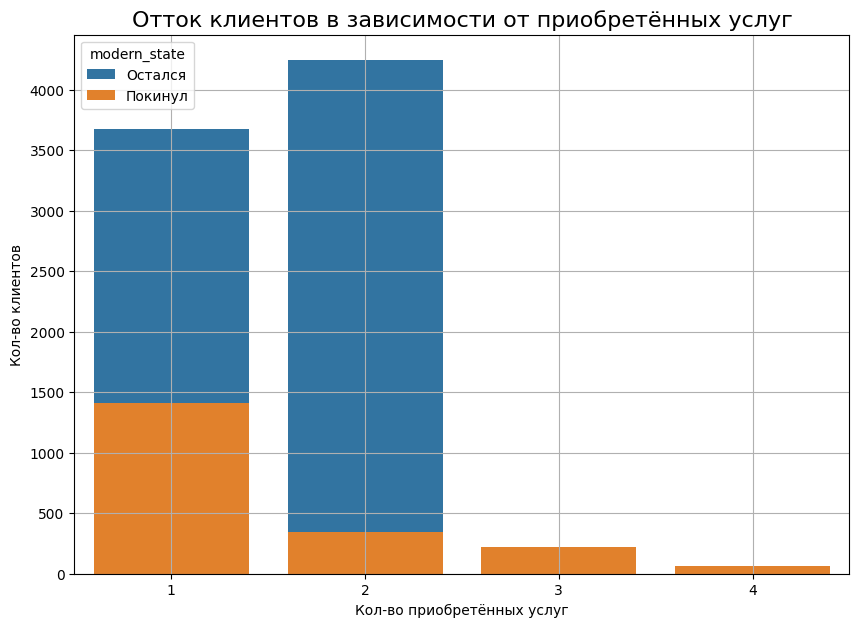

In [206]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

churn_data_7 = churn_data.groupby(['NumOfProducts', 'modern_state'], as_index=False).count()

barplot2 = sns.barplot(
    data=churn_data_7,
    x='NumOfProducts',
    y='CustomerId',
    hue='modern_state',
    ax = axes,
    dodge=False
)
axes.set_title('Отток клиентов в зависимости от приобретённых услуг', fontsize=16)
axes.set_xlabel('Кол-во приобретённых услуг')
axes.set_ylabel('Кол-во клиентов')
axes.grid()

Если клиент использует больше 2 услуг, то он собирается закончить использование банковских услуг.
Из тех клиентов, кто пользуется услугаме в размере до 2, чаще прекращают использовать услуги банка те, у кого активна только одна услуга.

## <center> 9.8 Влияние на отток статуса активного клиента

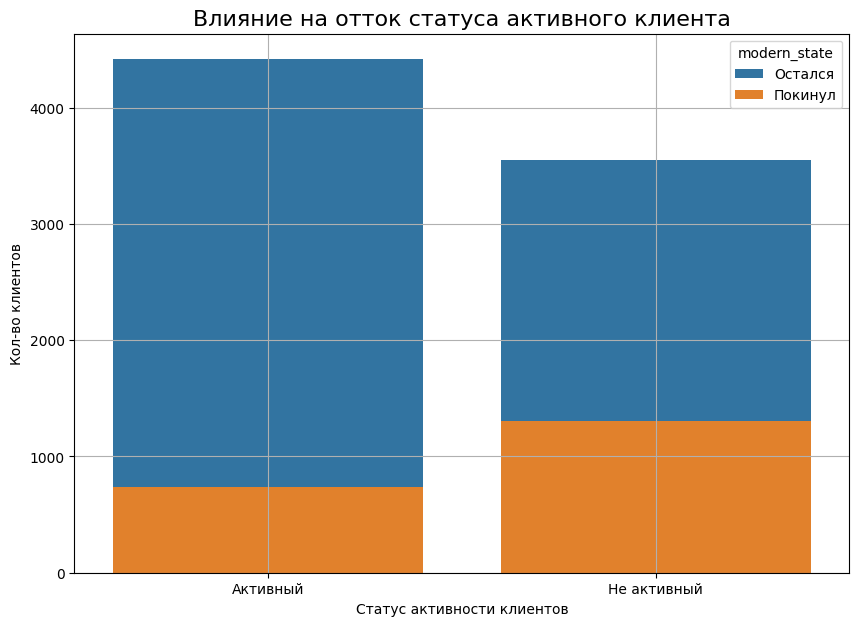

In [207]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

churn_data_8 = churn_data.groupby(['IsActiveMember', 'modern_state'], as_index=False).count()

barplot2 = sns.barplot(
    data=churn_data_8,
    x='IsActiveMember',
    y='CustomerId',
    hue='modern_state',
    ax = axes,
    dodge=False
)
axes.set_title('Влияние на отток статуса активного клиента', fontsize=16)
axes.set_xlabel('Статус активности клиентов')
axes.set_ylabel('Кол-во клиентов')
axes.grid()

Статус активности клиентов влияет на статус лояльности, т.к. среди неактивных количество ушедших больше. 
Для более точной рекомендации по части неактивных клиентов советую заказать у моей компании дополнительный анализ на зависимость статуса неактивного клиента от других параметров клиента.

## <center> 9.9 Отток клиентов в зависимости от страны

In [208]:
churn_data_9_1 = churn_data[churn_data['modern_state'] == 'Покинул'].groupby(['Geography'], as_index=False)['modern_state'].value_counts()
churn_data_9_2 = churn_data[churn_data['modern_state'] == 'Остался'].groupby(['Geography'], as_index=False)['modern_state'].value_counts()

churn_data_9_3 = churn_data_9_2.copy()
churn_data_9_3['count'] = churn_data_9_1['count'] / churn_data_9_2['count']

display(churn_data_9_1)
display(churn_data_9_2)
display(churn_data_9_3)

#churn_data_9_4 = churn_data.groupby(['Geography'], as_index=False)['modern_state'].value_counts(normalize=True)
#display(churn_data_9_4[churn_data_9_4['modern_state' == 'Покинул']].value_counts())

#строим график
fig = px.choropleth(
    data_frame=churn_data_9_3, #датафрейм
    locations="Geography", #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой plotly
    color="count", #от чего зависит цвет
    #animation_frame="date", #анимационный ползунок
    range_color=[0, 1.1],
    title='Отношение оставшихся к ушедшим клиентам в зависимости от страны', #заголовок
    width=800, #ширина
    height=500, #высота
    color_continuous_scale='Reds' #палитра цветов
)

#отображаем его
fig.show(renderer='notebook')

Geography modern_state  count
0    France      Покинул    810
1   Germany      Покинул    814
2     Spain      Покинул    413

Geography modern_state  count
0    France      Остался   4204
1   Germany      Остался   1695
2     Spain      Остался   2064

Geography modern_state     count
0    France      Остался  0.192674
1   Germany      Остался  0.480236
2     Spain      Остался  0.200097

Согласно графику, в Германии наибольшее отношение ушедших клиентов к оставшимся.

## <center> 9.10 Исследование взаимосвязи кредитного рейтинга и времени использования услуг банка и влияния этих факторов на отток

In [225]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
    
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)

In [226]:
churn_data_10 = churn_data.pivot_table(
    values = 'Exited',
    index = 'CreditScoreCat',
    columns = 'Tenure',
    aggfunc ='mean'
)
display(churn_data_10)

Tenure                0         1         2         3         4         5   \
CreditScoreCat                                                               
Excellent       0.275000  0.208333  0.137255  0.168317  0.131868  0.233333   
Fair            0.217391  0.215596  0.213043  0.216450  0.197248  0.206897   
Good            0.203822  0.203608  0.187342  0.205962  0.195122  0.214470   
Poor            0.226415  0.259398  0.211765  0.212245  0.233202  0.199153   
Very_Poor       0.444444  0.253731  0.151515  0.285714  0.293103  0.149254   

Tenure                6         7         8         9         10  
CreditScoreCat                                                    
Excellent       0.241379  0.127660  0.196078  0.270833  0.254902  
Fair            0.236364  0.171103  0.209016  0.190045  0.205357  
Good            0.182857  0.191892  0.152355  0.194667  0.197802  
Poor            0.179916  0.151261  0.214575  0.251082  0.169492  
Very_Poor       0.225352  0.206349  0.253521  0.229508  0.333333

Text(170.72222222222223, 0.5, 'Категория')

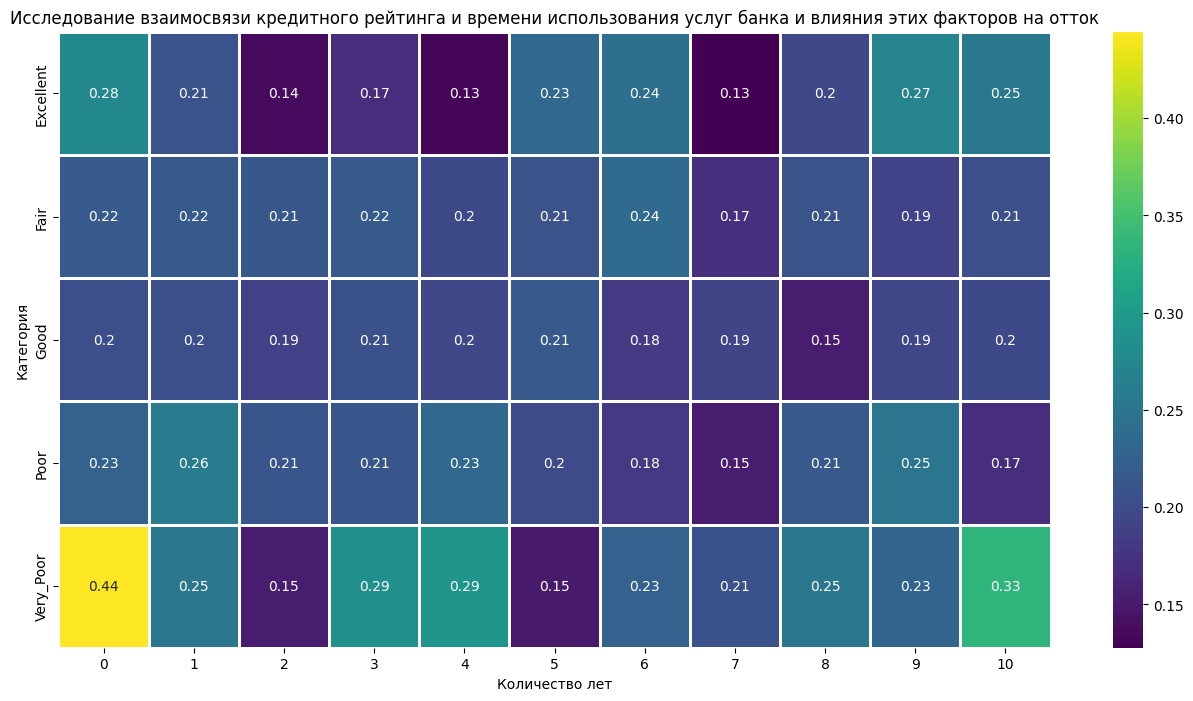

In [228]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 8))

dt_heatmap = sns.heatmap(
    churn_data_10,
    linewidth=1,
    linecolor='w',
    cmap='viridis',
    ax = axes,
    annot=True
)

dt_heatmap.set_title('Исследование взаимосвязи кредитного рейтинга и времени использования услуг банка и влияния этих факторов на отток')
dt_heatmap.set_xlabel('Количество лет')
dt_heatmap.set_ylabel('Категория')

Чаще всего уходят новые клиенты категории "Very_Poor"